<h1 style="text-align:center">Predicting the color of Vinho Verde wine based on selected physiochemical variables</h3>

<h1 style="text-align:center">Introduction</h1>

Understanding the factors that influence the color of Vinho Verde wine, which is a type of Portuguese wine, is essential for enhancing the quality control and production processes in the wine industry. In this study, we aim to investigate whether it is feasible to predict the color of Vinho Verde wine using specific physicochemical variables. Analyzing these relationships can provide valuable insights for winemakers to optimize production techniques and maintain consistent product quality. We will be utilizing [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) datasets, containing information on physicochemical properties and color attributes of Vinho Verde wines. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine which has the following variables: fixed acidity (concentration of non-volatile acids in the wine), volatile acidity (concentration of volatile acids), citric acid concentration (in $g/dm^3$ ), residual sugar content  (g/dm³), chloride content (in g/dm³), free sulfur dioxide (in mg/dm³), total sulfur dioxide (in $mg/cm^3$), density (in $g/cm^3$),  pH, sulfate content (in $g/dm^3$), alcohol content (as a vol percentage), quality (as a scale from 1-5 representing excellence). Chloride content, citric acid concentration, residual sugar content and free sulfur dioxide ($SO_2$) content will directly impact the taste and aroma of the wine. Residual sugar content influences sweetness, chloride salts affect the taste and aroma, citric acid enriches the flavor while free $SO_2$ is the active part of $SO_2$ that reacts with oxygen and other substances. Hence, this study seeks to answer the following question: <b>Can we accurately predict the color of Vinho Verde wine as either red or white using four selected physiochemical variables that are added to the wine mixture to alter the sensory and antioxidant properties of the wine?</b>


<h1 style="text-align:center">Methods & Results</h1><!--  -->

The wine quality dataset is cleaned and transformed before exploratory data analysis. The wine is divided into 2 subcategories (red and white). Figure 1 (see below) displays a distribution of the predictor variables by colour, indicating whether there is a relationship between the variables and the wine colour. Analyzing this figure can help determine which variables play a more significant role in determining the wine colour

In greater detail, first, we downloaded the dataset from the website and then we accessed it using Git Hub by clicking on 'raw' to get the URLs which we named `url1` and `url2`. Both are used to load the data from the web so that it will be repeatable as the Git Hub repository we are using is public. In order to wrangle and clean the data into a usable format, we have also renamed the columns and added categories for color by using `$`. To make an efficient and understandable model, we concentrated on certain pertinent characteristics of the wine in the dataset. Then, we use the function `write_csv2` in order to form a dataset consisting of predictor variables we have chosen and also with the  categorical variable which is color. The dataframe is called `combined_wine2`. As we continue with exploratory data analysis, we have created a training set and a testing set called `wine_train` and `wine_test` respectively to train and evaluate the KNN classifier. This allows us to assess the model's generalization performance for unseen data. In order to visualize the distribution of values for the chosen predictor variables, we used the function `pivot_longer` to have all the variable names under the column `variable` with their values under the column `value`. Note that there is also a column for the color of the wine so that we were able to visualize the distribution with histograms using `facet_grid` to look at how each of the variables are distributed while also comparing the distribution for red and white wine.

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(dplyr)
library(tidyclust)
library(rsample)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.8
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::dis

In [2]:
url1 <- "https://raw.githubusercontent.com/zaladmander/DSCI100-Group-Project/main/data/winequality-red.csv"
ur12 <- "https://raw.githubusercontent.com/zaladmander/DSCI100-Group-Project/main/data/winequality-white.csv" 

red_wine <- read_delim(file = url1, delim = ";") |> 
    rename(fixed_acidity = `fixed acidity`, 
           volatile_acidity = `volatile acidity`, 
           citric_acid = `citric acid`, 
           residual_sugar = `residual sugar`, 
           free_SO2 = `free sulfur dioxide`, 
           total_SO2 = `total sulfur dioxide`)

white_wine <- read_delim(file = "data/winequality-white.csv", delim = ";") |>
    rename(fixed_acidity = `fixed acidity`, 
           volatile_acidity = `volatile acidity`, 
           citric_acid = `citric acid`, 
           residual_sugar = `residual sugar`, 
           free_SO2 = `free sulfur dioxide`, 
           total_SO2 = `total sulfur dioxide`)

# adds category with $
red_wine$color <- "red"

# adds category with $
white_wine$color <- "white"

combined_wine <- bind_rows(red_wine, white_wine)

write_csv2(combined_wine, "combined_wine.csv")

combined_wine2 <- combined_wine |>
    select(free_SO2, chlorides, residual_sugar, citric_acid, color)

# uncomment to look at the df
#red_wine
#white_wine

# combined df for red wine and white wine
combined_wine2

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


free_SO2,chlorides,residual_sugar,citric_acid,color
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11,0.076,1.9,0.00,red
25,0.098,2.6,0.00,red
15,0.092,2.3,0.04,red
⋮,⋮,⋮,⋮,⋮
30,0.041,1.2,0.19,white
20,0.022,1.1,0.30,white
22,0.020,0.8,0.38,white


<b>Table 1.</b> A data set of both red and white Vinho Verde wine, with only the selected predictor variables, free_SO2 = free sulfur dioxide (in mg/dm³), chlorides = chloride content (in g/dm³), residual_sugar = residual sugar content (g/dm³), citric_acid = citric acid concentration (in g/dm³), and of course color, representing the wines color (red or white).

In [3]:
set.seed(2024)

wine_split <- initial_split(data = combined_wine2, prop = 0.75, strata = color)
wine_train <- training(wine_split)

glimpse(wine_train)
summary(wine_train)

Rows: 4,872
Columns: 5
$ free_SO2       <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 16, 9, 51, 6, 17…
$ chlorides      <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, 0.065,…
$ residual_sugar <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1, 1.6, …
$ citric_acid    <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0.02, 0…
$ color          <chr> "red", "red", "red", "red", "red", "red", "red", "red",…


    free_SO2        chlorides       residual_sugar    citric_acid    
 Min.   :  1.00   Min.   :0.00900   Min.   : 0.600   Min.   :0.0000  
 1st Qu.: 17.00   1st Qu.:0.03800   1st Qu.: 1.800   1st Qu.:0.2500  
 Median : 29.00   Median :0.04700   Median : 3.000   Median :0.3100  
 Mean   : 30.51   Mean   :0.05617   Mean   : 5.395   Mean   :0.3186  
 3rd Qu.: 41.00   3rd Qu.:0.06500   3rd Qu.: 8.000   3rd Qu.:0.4000  
 Max.   :289.00   Max.   :0.61100   Max.   :65.800   Max.   :1.2300  
    color          
 Length:4872       
 Class :character  
 Mode  :character  
                   
                   
                   

<b>Table 2.</b> A glimpse of a training set of both red and white Vinho Verde wines, free_SO2 = free sulfur dioxide (in mg/dm³), chlorides = chloride content (in g/dm³), residual_sugar = residual sugar content (g/dm³), citric_acid = citric acid concentration (in g/dm³), and of course color, representing the wines color (red or white).

In [4]:
wine_test <- testing(wine_split)
glimpse(wine_test)
summary(wine_test)

Rows: 1,625
Columns: 5
$ free_SO2       <dbl> 15, 17, 52, 35, 16, 10, 11, 7, 12, 9, 5, 12, 8, 6, 20, …
$ chlorides      <dbl> 0.097, 0.071, 0.176, 0.092, 0.368, 0.106, 0.080, 0.172,…
$ residual_sugar <dbl> 1.8, 6.1, 3.8, 1.8, 1.7, 1.6, 1.4, 1.5, 5.9, 2.2, 1.8, …
$ citric_acid    <dbl> 0.08, 0.36, 0.18, 0.56, 0.28, 0.21, 0.16, 0.09, 0.36, 0…
$ color          <chr> "red", "red", "red", "red", "red", "red", "red", "red",…


    free_SO2        chlorides       residual_sugar    citric_acid    
 Min.   :  1.00   Min.   :0.01200   Min.   : 0.700   Min.   :0.0000  
 1st Qu.: 17.00   1st Qu.:0.03700   1st Qu.: 1.800   1st Qu.:0.2400  
 Median : 29.00   Median :0.04700   Median : 3.200   Median :0.3100  
 Mean   : 30.57   Mean   :0.05563   Mean   : 5.589   Mean   :0.3186  
 3rd Qu.: 41.00   3rd Qu.:0.06500   3rd Qu.: 8.600   3rd Qu.:0.3900  
 Max.   :138.50   Max.   :0.46400   Max.   :31.600   Max.   :1.6600  
    color          
 Length:1625       
 Class :character  
 Mode  :character  
                   
                   
                   

<b>Table 3.</b> A glimpse of a testing set of both red and white Vinho Verde wines, free_SO2 = free sulfur dioxide (in mg/dm³), chlorides = chloride content (in g/dm³), residual_sugar = residual sugar content (g/dm³), citric_acid = citric acid concentration (in g/dm³), and of course color, representing the wines color (red or white).

<h1 style="text-align:center">Data Analysis</h1>

In [5]:
train_data_long <- wine_train |>
    pivot_longer(cols = free_SO2:citric_acid, names_to = "variable", values_to = "value")

variable_labels <- c(free_SO2 = "Free Sulfur \nDioxide Content \n(mg/dm³)", 
                     chlorides = "Chloride \nContent (g/dm³)", 
                     residual_sugar = "Residual Sugar \nContent (g/dm³)", 
                     citric_acid = "Citric Acid \nConcentration (g/dm³)")

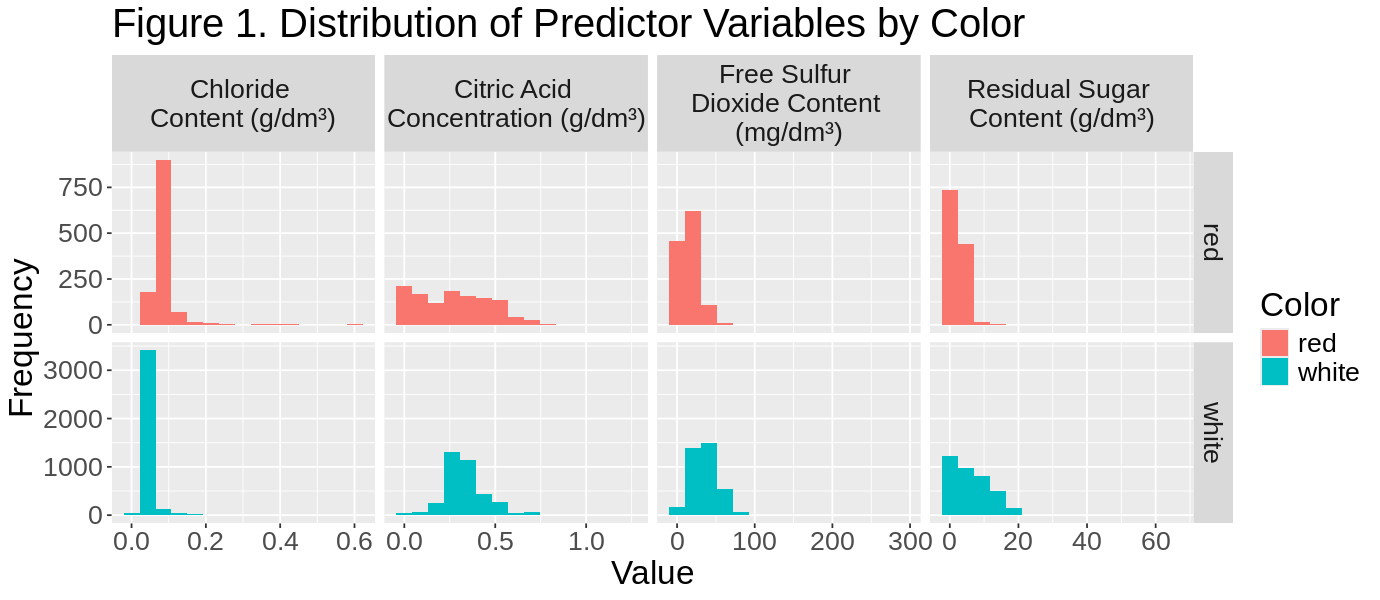

In [6]:
options(repr.plot.width = 11.5, repr.plot.height = 5)

plot1 <- train_data_long |> 
    ggplot(aes(x = value)) +
    geom_histogram(bins = 15, position = "identity", aes(fill = color)) +
    facet_grid(color ~ variable, scales = "free", labeller = labeller(variable = variable_labels)) +
    labs(x = "Value", y = "Frequency", fill = "Color", title = "Figure 1. Distribution of Predictor Variables by Color") +
    theme(text = element_text(size = 20))

plot1

As seen on Figure 1 (see above), we notice how for red wine, chloride content has a distribution positively skewed which peaks at 0.1 $g/dm^3$, while white wine has a distribution with the peak also between 0 and 0.1 but some datapoints to the left and very little to the peak's right. Citric acid concentration has a bell-shaped distribution for white wine with a sharp-peak (Lorentzian), but red wine has a flatter shape that slightly drops at the end. Free sulfur dioxide content in red wine has the largest distribution around 0 $mg/dm^3$ and larger values have lower frequencies while white wine has a Gaussian distribution with a peak around 45 $mg/dm^3$. Finally, both red and white tend to have residual sugar content close to zero but red wine appears to have more that are close to 0.


For the classification process, we first create a recipe that uses 'color' as the category to be predicted and the other four variables as the predictors. The training data is used for the recipe. Next, we create a 5-fold cross validation object named `vfold` and also a model specification set to classification with the neighbors specified as `tune()` so that we would be able to look for the best k value. The data analysis workflow combines the recipe and model specification and then fits the model using for the vfold object using the function `tune_grid` whose grid argument takes `k_vals` which is a tibble of neighbors that is a sequence of numbers from 1 to 100 with increments of 5. Then, we collect the results using the function `collect_metrics` which is under an object called `knn_results` and created an object called `accuracies` that takes `knn_results` and filters the variable `.metric` for only values that say `accuracy`. `accuracies` includes variables such as `neighbors` and `mean` which are then used as the x and y values for the line plot on Figure 2 (see below) called `cross_val_plot` so that we would be able to estimate the mean accuracy for each neighbor. We are able to identify the best k value by arranging the values with the mean in descending order in the dataframe `accuracies` and then using the functions `head()` and `pull()` to get the top observation (with arguments as 1 and 'neighbors' so that the highest neighbor value is picked). Our best k value is 21.



In [7]:
set.seed(2024) 

wine_recipe <- recipe(color ~ free_SO2 + chlorides + residual_sugar + citric_acid, data = wine_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

vfold <- vfold_cv(wine_train, v = 5, strata = color)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |> 
    filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9552540,5,0.0009568823,Preprocessor1_Model01
6,accuracy,binary,0.9577177,5,0.0013135369,Preprocessor1_Model02
11,accuracy,binary,0.9573078,5,0.0023278491,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.9476624,5,0.002999658,Preprocessor1_Model18
91,accuracy,binary,0.9472513,5,0.002517261,Preprocessor1_Model19
96,accuracy,binary,0.9493026,5,0.002090329,Preprocessor1_Model20


<b>Table 4.</b> A table of accuracies of each neighbor from 1 to 96, where mean is the accuracy number.

[1] "Best k value is 21"


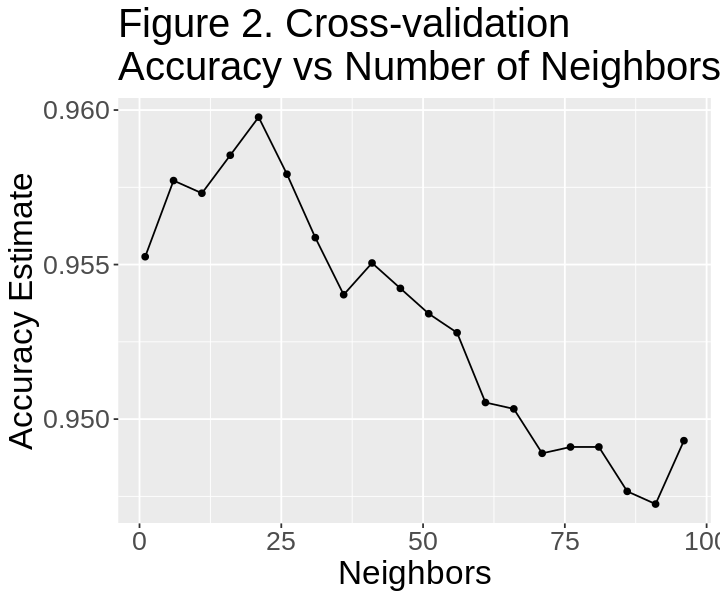

In [8]:
options(repr.plot.height = 5, repr.plot.width = 6)

cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 2. Cross-validation \nAccuracy vs Number of Neighbors")+
    theme(text = element_text(size = 20))
cross_val_plot

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
print(paste0("Best k value is ", best_k))

Now that we have determined the best k, we made another model specification which we named `knn_spec_2` and we trained the model using the training data by passing the same recipe but the new model and then fitting it. We then use the resulting fitting model to predict the color of wine for the testing data and we call the object `wine_test_predictions`. However, we also need to look at how accurate the result is so we filtered for the incorrect predictions by checking if the value for `.pred_class` has the same value as that of `color` and represented them using a bar chart as shown on Figure 3 (see below).

In [9]:
knn_spec_2<- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit_2 <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec_2) |>
    fit(data = wine_train)
           
wine_fit_2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03940887
Best kernel: rectangular
Best k: 21

.pred_class,free_SO2,chlorides,residual_sugar,citric_acid,color
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
red,15,0.097,1.8,0.08,red
white,17,0.071,6.1,0.36,red
white,52,0.176,3.8,0.18,red
⋮,⋮,⋮,⋮,⋮,⋮
white,68,0.048,8.30,0.38,white
white,45,0.028,5.70,0.28,white
white,34,0.030,11.75,0.27,white


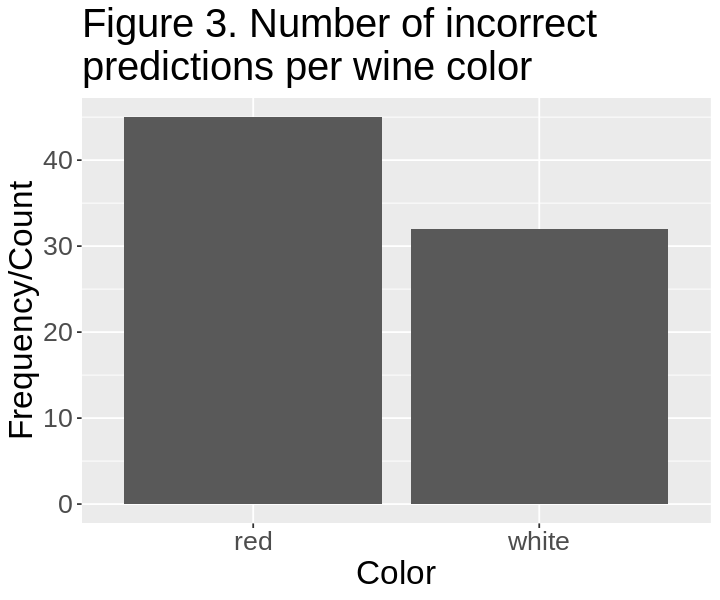

In [10]:
wine_test_predictions <- predict(wine_fit_2, wine_test) |>
    bind_cols(wine_test)
                         
wine_test_predictions

# how many incorrect predictions
inc_number <- filter(wine_test_predictions, .pred_class != color) |>
    ggplot(aes(x = color)) +
    geom_bar() +
    labs(x = "Color", y = "Frequency/Count", title = "Figure 3. Number of incorrect \npredictions per wine color")+
    theme(text=element_text(size=20))
inc_number

Below we test our classifier prediction on a few red and white wine from the test data set (data unseen by classifier). First, we slice 2 wines (1 red, 1 white) from `wine_test` and remove their color columns to prepare for the prediction, where we classify with `wine_fit_2` and the `predict` function. Thus, these few tests will show us an example of how accurate the classifier is.

In [11]:
# 2 red and white wines from test data
slice(wine_test, 1, 420)

# remove the color column to test
new_observation <- slice(wine_test, 1, 420) |>
    select(free_SO2:citric_acid)
new_observation

prediction <- predict(wine_fit_2, new_observation)
prediction

free_SO2,chlorides,residual_sugar,citric_acid,color
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
15,0.097,1.8,0.08,red
52,0.044,11.8,0.62,white


free_SO2,chlorides,residual_sugar,citric_acid
<dbl>,<dbl>,<dbl>,<dbl>
15,0.097,1.8,0.08
52,0.044,11.8,0.62


.pred_class
<fct>
red
white


Finally, using the metrics from our tuning workflow, our accuracy of correctly guessing the wine color is roughly 95.98% to two decimal places.


In [12]:
# our percent accuracy of guessing the correct wine color
wine_accuracy <- accuracies |>
    filter(neighbors == best_k) |>
    select(mean) |>
    pull(mean)

print(paste0("Accuracy of guessing the correct wine color is ", wine_accuracy*100, "%"))


[1] "Accuracy of guessing the correct wine color is 95.9770005382521%"


These code segments are essential for evaluating the performance of the predictive model `wine_fit_2`
on unseen data. By comparing predicted and actual wine colors, it enables the
assessment of prediction accuracy and identification of potential areas for model improvement.
The resulting bar plot provides a clear visual representation of prediction errors, 
highlighting which wine color categories are more challenging for the model to predict accurately.

<h1 style="text-align:center">Discussion</h1>

We aim to look at how four selected physiochemical variables from the introduction impact the color of wine. To get the maximum possible accuracy, the number of neighbors (K) in the K-Nearest Neighbors (KNN) classification model is chosen through a tuning process. The final model's 21 neighbors are chosen based on Table 4 (see above). The KNN model is evaluated using training data, producing an accuracy of about 96%. We have found out that free $SO_2$, residual sugar, citric acid, and chlorides can be used as predictors to categorize wine by color (red or white) to an accuracy of $ 95.98 \%$ to  two decimal places. However, red wine has a higher proportion of incorrect predictions as shown in Figure 3 (see above) which suggests that there might be other factors determining color other than the chemicals purposely added such as the amount of oxidation that happens to reduce the fruity flavour in exchange for a nuttier and richer flavour (Puckette, 2017). Nevertheless, predicting the color of Vinho Verder wines based on the four selected physiochemical variables with an accuracy of roughly $96\%$ allows winemakers to optimize the production process and guarantee consistency in color. Looking back at our expected outcomes, the study and model was successful in determining a relationship between the properties of wine (the predictors) and its colour. Using the relationship determined between the predictors of each wine after analyzing Figure 1 (see above), it is clear that red and white wine differ in their physiochemical properties as our model had an accuracy of roughly 96%. This could further lead us to conclude that not only do the physiochemical properties of wine play a big role in determining the colour of wine, but could also be correlated with the grape variety used in the winemaking (Er & Atasoy, 2016). 

The predictive model could have practical implications for winemakers such as enabling better monitoring and control of wine color during production to maintain consistency. Additionally, it provides insights into adjusting winemaking processes to achieve desired color profiles based on physiochemical parameters. By considering these predictors, winemakers can optimize production processes to ensure consistency in color, thereby enhancing product quality and marketability. This predictive model not only aids in streamlining production but also offers insights into the underlying chemical dynamics governing wine coloration. Furthermore, our study underscores the importance of considering both intentional additives and intrinsic chemical transformations during winemaking to better understand color variability.

Despite the promising predictive accuracy of our model, several intriguing questions can be posed:

1.	Identification of Dominant Variables: Which physiochemical variables exert the greatest influence on wine color? Exploring the relative impact of each factor could refine our predictive capabilities and deepen our understanding of color determinants.
2.	Role of Oxidation: How does oxidation during winemaking affect the relationship between these variables and color outcomes? Investigating oxidation levels and its impact on flavor evolution could elucidate the broader factors shaping wine aesthetics.
3.  Comparative Analysis: How applicable is our model beyond Vinho Verde wines? Testing the validity of our predictive framework across different wine varietals could unveil nuanced variations in color determinants across diverse winemaking traditions and grape cultivars.
4.	It would be interesting to see which variables have the greatest impact on wine color and also compare it to how much of the wine is oxidized. It would also be interesting to see how are the physiochemical variables influenced by winemaking techniques such as in relation to oxidation (Karbowiak et al., 2009). 
5.	Are there any lurking variables that also must be taken into consideration when evaluating and predicting wine colour? If so, what could they be?

In conclusion, while our study offers a promising framework for predicting Vinho wine color based on physiochemical variables, ongoing research is essential to show the real influence of factors shaping wine aesthetics. By addressing these questions, we can refine our understanding of wine coloration.





<h1 style="text-align:center">References</h1>

Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T., and Reis, J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

Puckette, M. (2017, September 5). Red Wine vs White Wine: The Real Differences. Wine Folly. https://winefolly.com/tips/red-wine-vs-white-wine-the-real-differences/

Karbowiak, T., Gougeon, R. D., Alinc, J. B., Brachais, L., Debeaufort, F., Voilley, A., & Chassagne, D. (2009). Wine oxidation and the role of cork. Critical reviews in food science and nutrition, 50(1), 20-52.

Er, Y., & Atasoy, A. (2016). The classification of white wine and red wine according to their physicochemical qualities. International Journal of Intelligent Systems and Applications in Engineering, 4(Special Issue-1), 23-26.
